# Data Exploration

This notebook explores the Fashion-MNIST and CIFAR-10 datasets.

## Goals:
- Load datasets
- Visualize sample images
- Understand data distributions
- Check for class imbalances
- Explore data preprocessing options


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add parent directory to path
sys.path.append('..')

# Import custom data loading functions
from src.data_loader import (
    download_fashion_mnist,
    download_cifar10,
    load_fashion_mnist, 
    load_cifar10, 
    get_class_names,
    preprocess_data
)

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

%matplotlib inline

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# Reload modules to get latest changes
import importlib
import sys

# Remove cached modules
if 'data_loader' in sys.modules:
    del sys.modules['data_loader']

# Re-import
from src.data_loader import (
    download_fashion_mnist,
    download_cifar10,
    load_fashion_mnist, 
    load_cifar10, 
    get_class_names,
    preprocess_data
)

print("✅ Modules reloaded successfully!")


✅ Modules reloaded successfully!


## 1. Load Fashion-MNIST Dataset

TODO: Load the Fashion-MNIST dataset


In [3]:
# Download Fashion-MNIST if not already downloaded
data_dir = '../data'

try:
    print("Downloading Fashion-MNIST (if needed)...")
    download_fashion_mnist(data_dir)
    
    # Load the dataset
    print("\nLoading Fashion-MNIST...")
    X_train_fmnist, y_train_fmnist, X_test_fmnist, y_test_fmnist = load_fashion_mnist(data_dir)
    
except Exception as e:
    print(f"❌ Error loading Fashion-MNIST: {e}")
    import traceback
    traceback.print_exc()
    raise

print(f"✅ Fashion-MNIST loaded!")
print(f"   Training set: {X_train_fmnist.shape[0]:,} images")
print(f"   Test set: {X_test_fmnist.shape[0]:,} images")
print(f"   Image size: {X_train_fmnist.shape[1]}x{X_train_fmnist.shape[2]}")

# Get class names
fmnist_classes = get_class_names('fashion_mnist')
print(f"   Classes: {fmnist_classes}")


train-images-idx3-ubyte.gz already exists, skipping...
train-labels-idx1-ubyte.gz already exists, skipping...
t10k-images-idx3-ubyte.gz already exists, skipping...
t10k-labels-idx1-ubyte.gz already exists, skipping...

Loading Fashion-MNIST...
✅ Fashion-MNIST loaded!
   Training set: 60,000 images
   Test set: 10,000 images
   Image size: 28x28
   Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 2. Explore Dataset Properties

TODO: Print dataset shapes and statistics


In [4]:
# Print detailed dataset statistics
print("=" * 60)
print("Fashion-MNIST Dataset Statistics")
print("=" * 60)

print(f"\n📊 Shape Information:")
print(f"   Training images: {X_train_fmnist.shape}")
print(f"   Training labels: {y_train_fmnist.shape}")
print(f"   Test images: {X_test_fmnist.shape}")
print(f"   Test labels: {y_test_fmnist.shape}")

print(f"\n📈 Value Ranges:")
print(f"   Pixel values: {X_train_fmnist.min()} - {X_train_fmnist.max()}")
print(f"   Data type: {X_train_fmnist.dtype}")
print(f"   Label range: {y_train_fmnist.min()} - {y_train_fmnist.max()}")

print(f"\n💾 Memory Usage:")
train_size_mb = X_train_fmnist.nbytes / (1024**2)
test_size_mb = X_test_fmnist.nbytes / (1024**2)
print(f"   Training set: {train_size_mb:.2f} MB")
print(f"   Test set: {test_size_mb:.2f} MB")
print(f"   Total: {train_size_mb + test_size_mb:.2f} MB")

# Check for missing values
print(f"\n🔍 Data Quality:")
print(f"   NaN values in training set: {np.isnan(X_train_fmnist).sum()}")
print(f"   NaN values in test set: {np.isnan(X_test_fmnist).sum()}")

##


Fashion-MNIST Dataset Statistics

📊 Shape Information:
   Training images: (60000, 28, 28)
   Training labels: (60000,)
   Test images: (10000, 28, 28)
   Test labels: (10000,)

📈 Value Ranges:
   Pixel values: 0 - 255
   Data type: uint8
   Label range: 0 - 9

💾 Memory Usage:
   Training set: 44.86 MB
   Test set: 7.48 MB
   Total: 52.34 MB

🔍 Data Quality:
   NaN values in training set: 0
   NaN values in test set: 0


## 3. Visualize Sample Images

Let's look at some example images from each class.


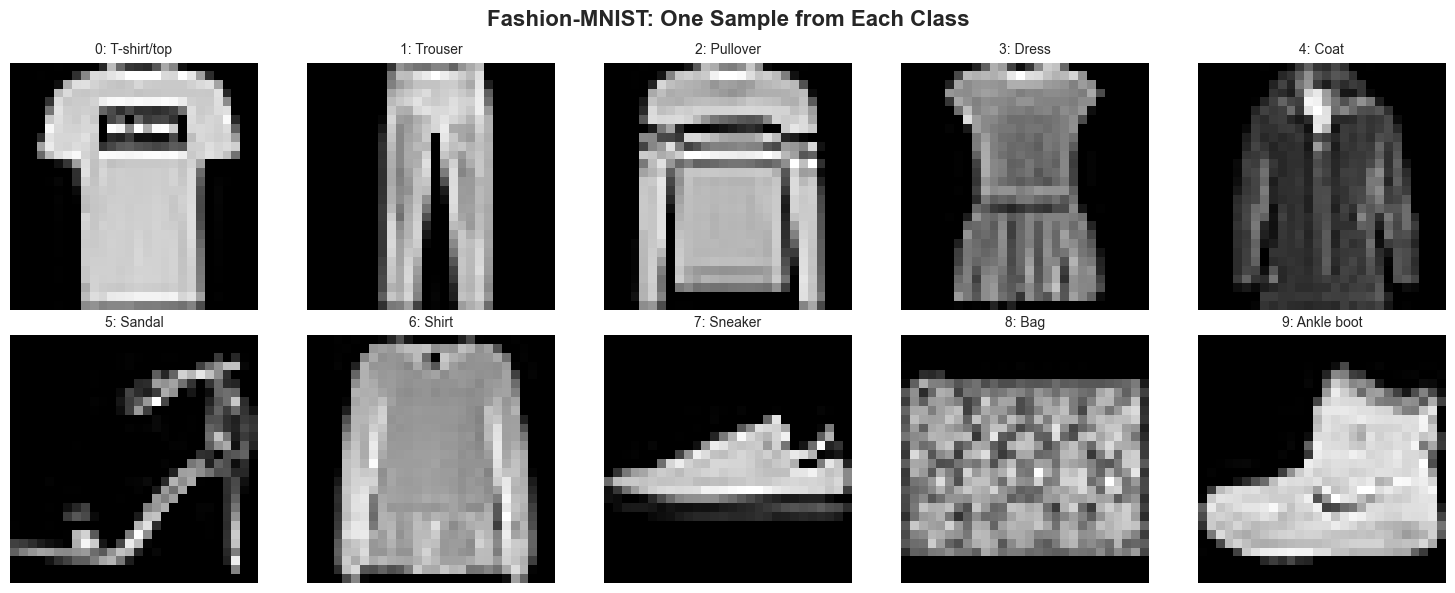

In [5]:
# Visualize one image from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Fashion-MNIST: One Sample from Each Class', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    # Find first image of class i
    idx = np.where(y_train_fmnist == i)[0][0]
    
    # Display image
    ax.imshow(X_train_fmnist[idx], cmap='gray')
    ax.set_title(f'{i}: {fmnist_classes[i]}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


## 4. Class Distribution Analysis

Check if the dataset is balanced across all classes.


In [ ]:
# Count samples per class
train_counts = np.bincount(y_train_fmnist)
test_counts = np.bincount(y_test_fmnist)

# Print statistics
print("Class balance check:")
print(f"Training set - Min: {train_counts.min()}, Max: {train_counts.max()}, Std: {train_counts.std():.2f}")
print(f"Test set - Min: {test_counts.min()}, Max: {test_counts.max()}, Std: {test_counts.std():.2f}")
print(f"✅ Dataset is {'balanced' if train_counts.std() < 100 else 'imbalanced'}")


Class balance check:
Training set - Min: 6000, Max: 6000, Std: 0.00
Test set - Min: 1000, Max: 1000, Std: 0.00
✅ Dataset is balanced


## 5. Pixel Intensity Analysis

Understanding pixel value distributions helps us choose good preprocessing strategies.


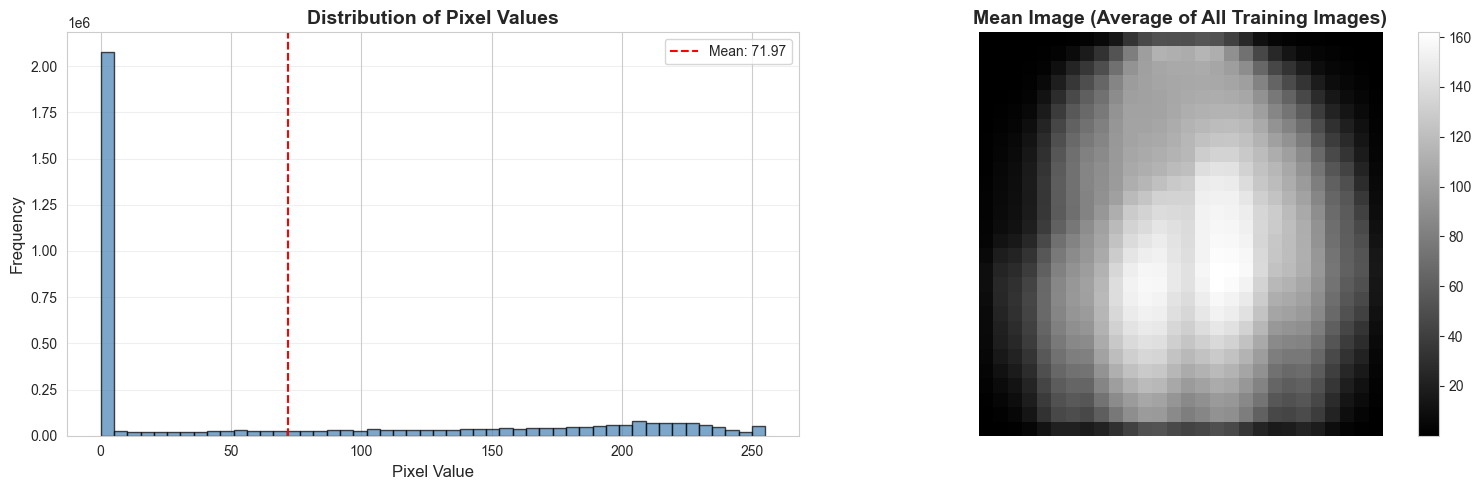

Pixel intensity statistics:
  Mean: 71.97
  Std: 89.64
  Min: 0
  Max: 255


In [7]:
# Sample a subset for faster computation
sample_size = 5000
sample_idx = np.random.choice(len(X_train_fmnist), sample_size, replace=False)
X_sample = X_train_fmnist[sample_idx]

# Flatten images to analyze pixel distribution
pixels_flat = X_sample.flatten()

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of pixel values
axes[0].hist(pixels_flat, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Pixel Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Pixel Values', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axvline(pixels_flat.mean(), color='red', linestyle='--', label=f'Mean: {pixels_flat.mean():.2f}')
axes[0].legend()

# Mean pixel value per position (create average image)
mean_image = X_train_fmnist.mean(axis=0)
im = axes[1].imshow(mean_image, cmap='gray')
axes[1].set_title('Mean Image (Average of All Training Images)', fontsize=14, fontweight='bold')
axes[1].axis('off')
plt.colorbar(im, ax=axes[1], fraction=0.046)

plt.tight_layout()
plt.show()

print(f"Pixel intensity statistics:")
print(f"  Mean: {pixels_flat.mean():.2f}")
print(f"  Std: {pixels_flat.std():.2f}")
print(f"  Min: {pixels_flat.min()}")
print(f"  Max: {pixels_flat.max()}")


## 6. Load and Explore CIFAR-10

Now let's explore the CIFAR-10 dataset (color images, 32x32, 10 classes).


In [8]:
# Download CIFAR-10 if not already downloaded (this may take a while)
print("Downloading CIFAR-10 (if needed)...")
download_cifar10(data_dir)

# Load the dataset
print("\nLoading CIFAR-10...")
X_train_cifar, y_train_cifar, X_test_cifar, y_test_cifar = load_cifar10(data_dir)

print(f"✅ CIFAR-10 loaded!")
print(f"   Training set: {X_train_cifar.shape[0]:,} images")
print(f"   Test set: {X_test_cifar.shape[0]:,} images")
print(f"   Image size: {X_train_cifar.shape[1]}x{X_train_cifar.shape[2]} x {X_train_cifar.shape[3]} channels")

# Get class names
cifar_classes = get_class_names('cifar10')
print(f"   Classes: {cifar_classes}")

# Print statistics
print(f"\n📊 CIFAR-10 Statistics:")
print(f"   Pixel range: {X_train_cifar.min()} - {X_train_cifar.max()}")
print(f"   Data type: {X_train_cifar.dtype}")
print(f"   Memory: {X_train_cifar.nbytes / (1024**2):.2f} MB (train) + {X_test_cifar.nbytes / (1024**2):.2f} MB (test)")


CIFAR-10 already downloaded and extracted

Loading CIFAR-10...
✅ CIFAR-10 loaded!
   Training set: 50,000 images
   Test set: 10,000 images
   Image size: 32x32 x 3 channels
   Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

📊 CIFAR-10 Statistics:
   Pixel range: 0 - 255
   Data type: uint8
   Memory: 146.48 MB (train) + 29.30 MB (test)


## 7. Visualize CIFAR-10 Samples

CIFAR-10 images are much smaller (32x32) and in color (RGB).


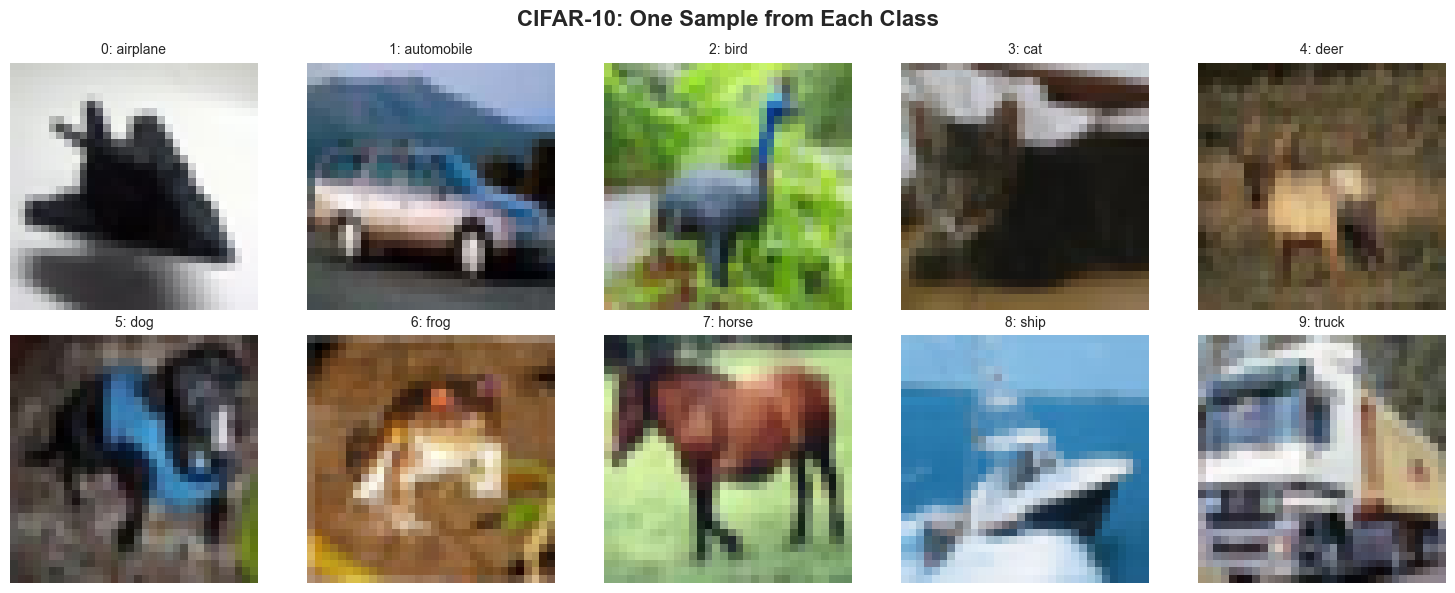


Multiple examples from 'airplane' class:


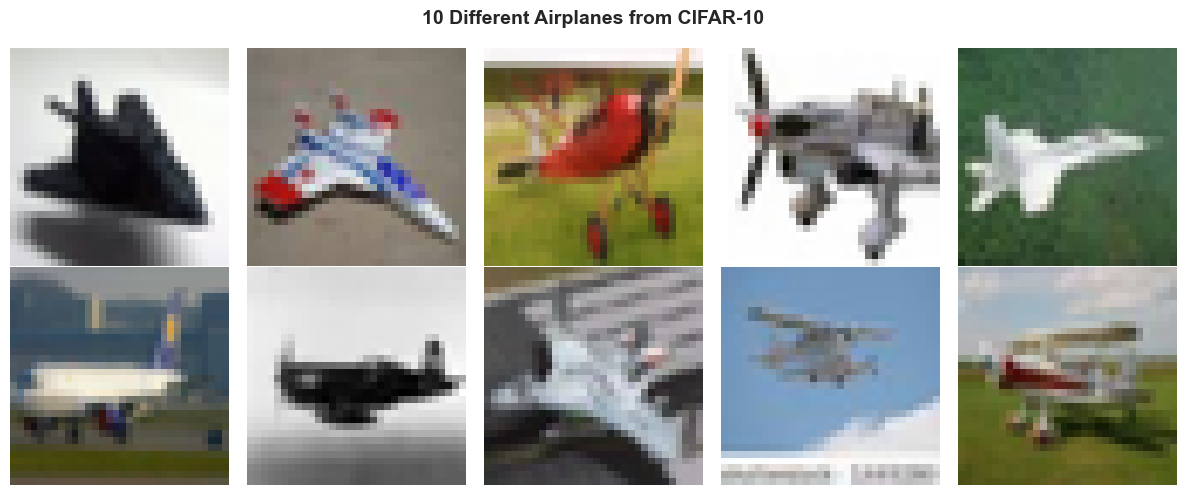

In [9]:
# Visualize one image from each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('CIFAR-10: One Sample from Each Class', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    # Find first image of class i
    idx = np.where(y_train_cifar == i)[0][0]
    
    # Display RGB image
    ax.imshow(X_train_cifar[idx])
    ax.set_title(f'{i}: {cifar_classes[i]}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Show multiple examples from one class
print("\nMultiple examples from 'airplane' class:")
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
airplane_indices = np.where(y_train_cifar == 0)[0][:10]

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_cifar[airplane_indices[i]])
    ax.axis('off')

plt.suptitle('10 Different Airplanes from CIFAR-10', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 8. Dataset Comparison

Let's compare the two datasets side by side.


In [16]:
# Create comparison table
import pandas as pd

comparison = pd.DataFrame({
    'Property': [
        'Training Samples',
        'Test Samples',
        'Image Size',
        'Channels',
        'Total Pixels',
        'Number of Classes',
        'Memory (Train)',
        'Color'
    ],
    'Fashion-MNIST': [
        f'{X_train_fmnist.shape[0]:,}',
        f'{X_test_fmnist.shape[0]:,}',
        f'{X_train_fmnist.shape[1]}x{X_train_fmnist.shape[2]}',
        '1 (Grayscale)',
        f'{28*28} pixels',
        '10',
        f'{X_train_fmnist.nbytes / (1024**2):.1f} MB',
        'Grayscale'
    ],
    'CIFAR-10': [
        f'{X_train_cifar.shape[0]:,}',
        f'{X_test_cifar.shape[0]:,}',
        f'{X_train_cifar.shape[1]}x{X_train_cifar.shape[2]}',
        '3 (RGB)',
        f'{32*32*3} pixels',
        '10',
        f'{X_train_cifar.nbytes / (1024**2):.1f} MB',
        'RGB Color'
    ]
})

print("=" * 45)
print("DATASET COMPARISON".center(45))
print("=" * 45)
print(comparison.to_string(index=False))
print("=" * 45)

# Complexity comparison
fmnist_complexity = X_train_fmnist.shape[0] * 28 * 28
cifar_complexity = X_train_cifar.shape[0] * 32 * 32 * 3

print(f"\n💡 Key Insights:")
print(f"   • Fashion-MNIST is simpler: grayscale, easier to train")
print(f"   • CIFAR-10 is more complex: color images, more challenging")
print(f"   • CIFAR-10 has {cifar_complexity/fmnist_complexity:.1f}x more parameters per training set")
print(f"   • Both datasets are balanced (6,000 samples per class for training)")


              DATASET COMPARISON             
         Property Fashion-MNIST    CIFAR-10
 Training Samples        60,000      50,000
     Test Samples        10,000      10,000
       Image Size         28x28       32x32
         Channels 1 (Grayscale)     3 (RGB)
     Total Pixels    784 pixels 3072 pixels
Number of Classes            10          10
   Memory (Train)       44.9 MB    146.5 MB
            Color     Grayscale   RGB Color

💡 Key Insights:
   • Fashion-MNIST is simpler: grayscale, easier to train
   • CIFAR-10 is more complex: color images, more challenging
   • CIFAR-10 has 3.3x more parameters per training set
   • Both datasets are balanced (6,000 samples per class for training)


## 9. Data Preprocessing Demo

See how preprocessing transforms the raw data for neural network training.


Before preprocessing:
  Shape: (10, 28, 28)
  Data type: uint8
  Value range: [0, 255]
  Labels shape: (10,)
  Labels: [9 0 0 3 0 2 7 2 5 5]

After preprocessing:
  Shape: (10, 784) (flattened to vectors)
  Data type: float32
  Value range: [0.000, 1.000] (normalized)
  Labels shape: (10, 10) (one-hot encoded)
  First label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
    -> Class 9 (Ankle boot)


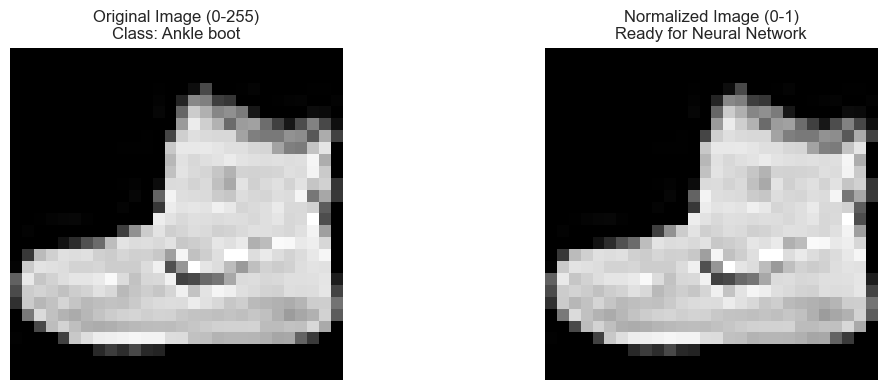


✅ Data is now ready for training your neural network!


In [ ]:
# Take a small sample for demonstration
X_sample_fmnist = X_train_fmnist[:10]
y_sample_fmnist = y_train_fmnist[:10]

print("Before preprocessing:")
print(f"  Shape: {X_sample_fmnist.shape}")
print(f"  Data type: {X_sample_fmnist.dtype}")
print(f"  Value range: [{X_sample_fmnist.min()}, {X_sample_fmnist.max()}]")
print(f"  Labels shape: {y_sample_fmnist.shape}")
print(f"  Labels: {y_sample_fmnist}")

# Apply preprocessing: flatten and normalize
X_processed, y_processed = preprocess_data(
    X_sample_fmnist, 
    y_sample_fmnist, 
    num_classes=10,
    flatten=True,
    normalize=True
)

print("\n" + "="*60)
print("After preprocessing:")
print(f"  Shape: {X_processed.shape} (flattened to vectors)")
print(f"  Data type: {X_processed.dtype}")
print(f"  Value range: [{X_processed.min():.3f}, {X_processed.max():.3f}] (normalized)")
print(f"  Labels shape: {y_processed.shape} (one-hot encoded)")
print(f"  First label: {y_processed[0]}")
print(f"    -> Class {y_sample_fmnist[0]} ({fmnist_classes[y_sample_fmnist[0]]})")

# Visualize the effect of normalization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original image
axes[0].imshow(X_sample_fmnist[0], cmap='gray', vmin=0, vmax=255)
axes[0].set_title(f'Original Image (0-255)\nClass: {fmnist_classes[y_sample_fmnist[0]]}', fontsize=12)
axes[0].axis('off')

# Normalized image (reshaped from flat)
normalized_img = X_processed[0].reshape(28, 28)
axes[1].imshow(normalized_img, cmap='gray', vmin=0, vmax=1)
axes[1].set_title(f'Normalized Image (0-1)\nReady for Neural Network', fontsize=12)
axes[1].axis('off')

plt.tight_layout()
plt.show()
